Project: **Exploratory Data Analysis for the CDC Chronic Disease Indicators (CDI): Diabetes Dataset**

This code was written by Zainab Haider

Jupyter Notebook/Python

Date: 08/24/2020

*Library:*

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import levene
import os

overall = pd.read_csv(r'...\Overall_Diabetes_CDI.csv')
gender = pd.read_csv(r'...\Gender_Diabetes_CDI.csv')
race = pd.read_csv(r'...\Race_Diabetes_CDI.csv')

overall.rename(columns = {'YearStart':'Year'}, inplace = True)
gender.rename(columns = {'YearStart':'Year'}, inplace = True)
race.rename(columns = {'YearStart':'Year'}, inplace = True)

overall = overall.loc[(overall.LocationDesc != 'Guam') & (overall.LocationDesc != 'Puerto Rico') & (overall.LocationDesc != 'Virgin Islands')]
gender = gender.loc[(gender.LocationDesc != 'Guam') & (gender.LocationDesc != 'Puerto Rico') & (gender.LocationDesc != 'Virgin Islands')]
race = race.loc[(race.LocationDesc != 'Guam') & (race.LocationDesc != 'Puerto Rico') & (race.LocationDesc != 'Virgin Islands')]

**Question: What is the role of diabetes' comorbidities: high blood pressure and high cholesterol?**

A library of data subsets to use throughout this analysis.

In [2]:
hbp_overall = overall.loc[overall.Question == 'Prevalence of high blood pressure among adults aged >= 18 years with diagnosed diabetes']
hbp_gender = gender.loc[gender.Question == 'Prevalence of high blood pressure among adults aged >= 18 years with diagnosed diabetes']

hcl_overall = overall.loc[overall.Question == 'Prevalence of high cholesterol among adults aged >= 18 years with diagnosed diabetes']
hcl_gender = gender.loc[gender.Question == 'Prevalence of high cholesterol among adults aged >= 18 years with diagnosed diabetes']

hbp_ovr = hbp_overall.loc[(hbp_overall.DataValueType == 'Age-adjusted Prevalence') & (hbp_overall.LocationAbbr != 'US')]
hbp_g = hbp_gender.loc[(hbp_gender.DataValueType == 'Age-adjusted Prevalence') & (hbp_gender.LocationAbbr != 'US')]

hcl_ovr = hcl_overall.loc[(hcl_overall.DataValueType == 'Age-adjusted Prevalence') & (hcl_overall.LocationAbbr != 'US')]
hcl_g = hcl_gender.loc[(hcl_gender.DataValueType == 'Age-adjusted Prevalence') & (hcl_gender.LocationAbbr != 'US')]

diabetesbelt = ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana',
               'North Carolina', 'Ohio', 'Pennsylvania', 'South Carolina', 'Tennessee',
                'Texas', 'Virginia','West Virginia', 'Mississippi']

Overall Prevalence of High Blood Pressure among adults with diagnosed diabetes:

Text(0, 0.5, 'State')

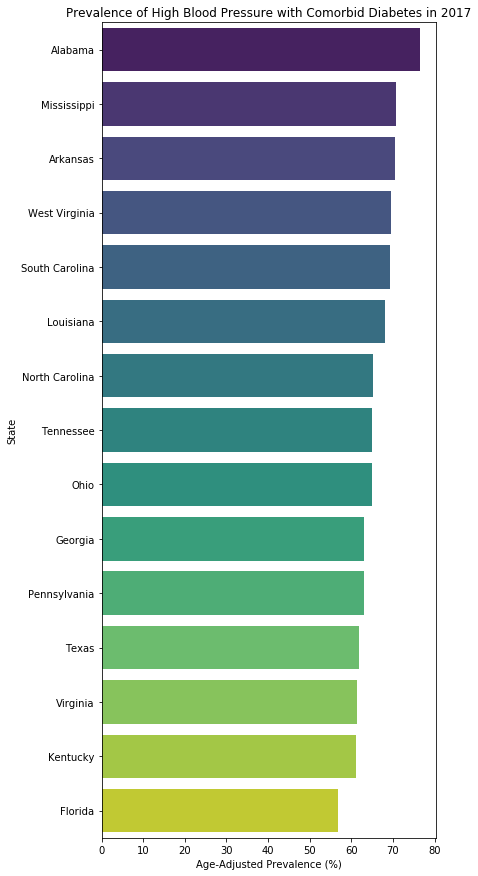

In [3]:
y = hbp_ovr.loc[(hbp_ovr.Year == 2017) & (hbp_ovr.LocationDesc.isin(diabetesbelt))].sort_values('DataValue',ascending=False).reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x='DataValue', y='LocationDesc', data = y, palette = 'viridis')
plt.title('Prevalence of High Blood Pressure with Comorbid Diabetes in 2017')
plt.xlabel('Age-Adjusted Prevalence (%)')
plt.ylabel('State')

Overall Prevalence of High Cholesterol among adults with diagnosed diabetes:

Text(0, 0.5, 'State')

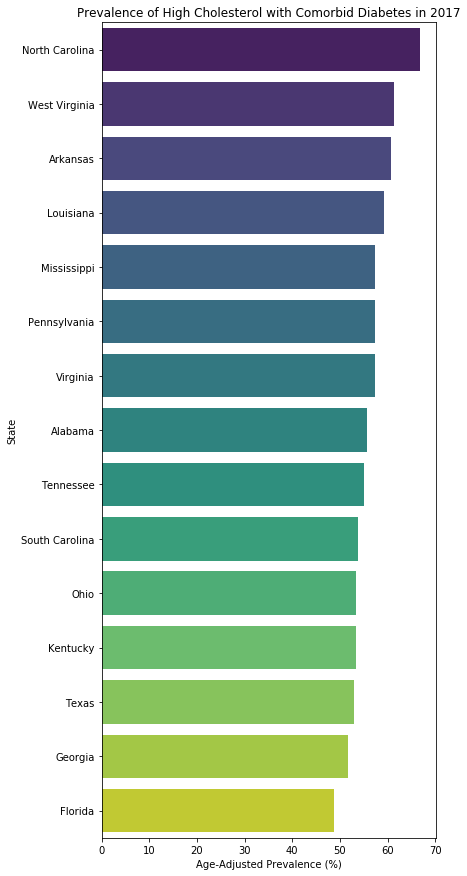

In [4]:
y = hcl_ovr.loc[(hcl_ovr.Year == 2017) & (hcl_ovr.LocationDesc.isin(diabetesbelt))].sort_values('DataValue',ascending=False).reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x='DataValue', y='LocationDesc', data = y, palette = 'viridis')
plt.title('Prevalence of High Cholesterol with Comorbid Diabetes in 2017')
plt.xlabel('Age-Adjusted Prevalence (%)')
plt.ylabel('State')

Overall Prevalence of High Blood Pressure and High Cholesterol among adults with diagnosed diabetes:

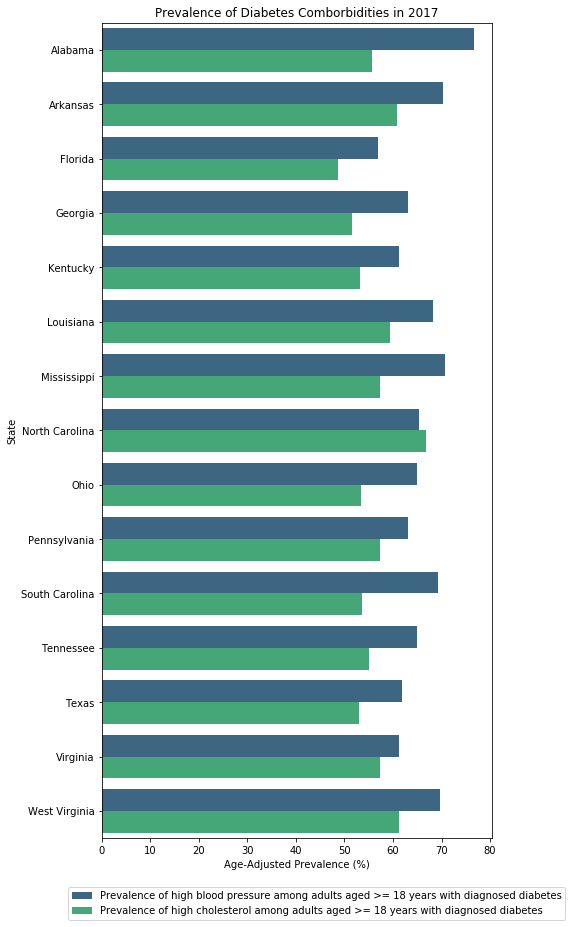

In [5]:
overall3 = overall.loc[(overall.DataValueType == 'Age-adjusted Prevalence') & (overall.Year == 2017)]
questions = ['Prevalence of high blood pressure among adults aged >= 18 years with diagnosed diabetes', 
            'Prevalence of high cholesterol among adults aged >= 18 years with diagnosed diabetes']

all_highest = overall3.sort_values('LocationDesc', ascending = True).reset_index()
all_highest = all_highest.loc[(all_highest.LocationDesc.isin(diabetesbelt)) & (all_highest.Question.isin(questions))]

f, ax = plt.subplots(figsize=(7, 15))
sns.barplot(x='DataValue', y='LocationDesc', hue = 'Question', data = all_highest, palette = 'viridis')
plt.title('Prevalence of Diabetes Comborbidities in 2017')
plt.xlabel('Age-Adjusted Prevalence (%)')
plt.ylabel('State')
ax.legend(loc='center left', bbox_to_anchor=(-.1, -.08), ncol=1)

Prevalence of High Blood Pressure among adults with diagnosed diabetes by Gender:

Text(0.5, 1.0, 'Prevalence of High Blood Pressure with Comorbid Diabetes by Gender in 2017')

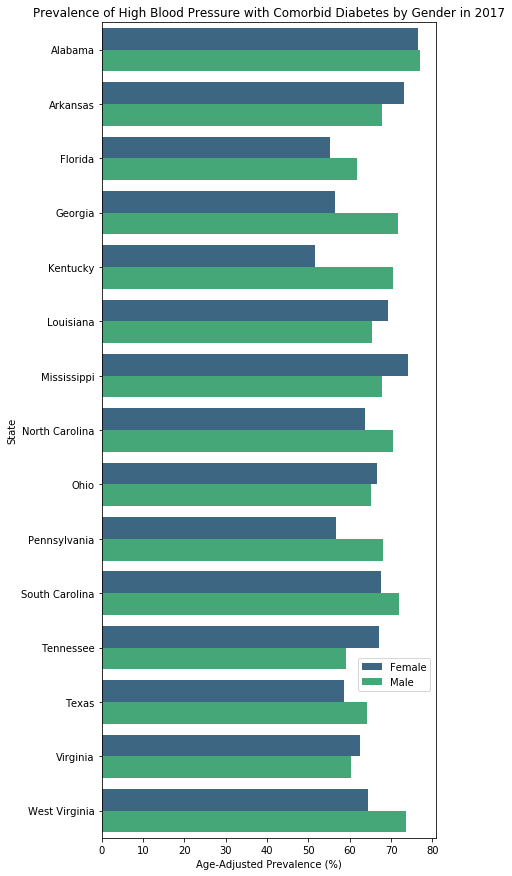

In [6]:
g = hbp_g.loc[(hbp_g.Year == 2017) & (hbp_g.LocationDesc.isin(diabetesbelt))].sort_values('LocationDesc',ascending=True).reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x='DataValue', y='LocationDesc', hue = 'Stratification1', data = g, palette = 'viridis')
ax.set(ylabel='State', xlabel='Age-Adjusted Prevalence (%)')
ax.legend(loc='center left', bbox_to_anchor=(.75, .2), ncol=1)

plt.title('Prevalence of High Blood Pressure with Comorbid Diabetes by Gender in 2017')

Prevalence of High Cholesterol among adults with diagnosed diabetes by Gender:

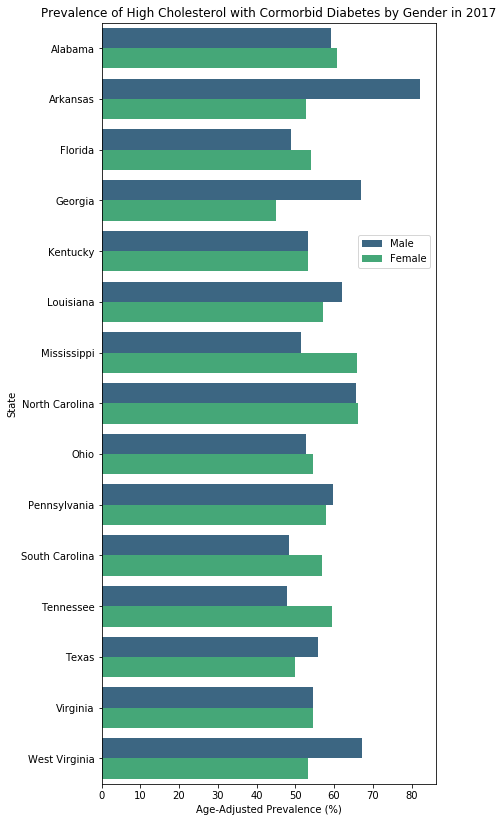

In [7]:
hcl_g_highest = hcl_g.sort_values('LocationDesc', ascending = True).reset_index()
hcl_g_highest = hcl_g_highest.loc[(hcl_g_highest.Year == 2017) & (hcl_g_highest.LocationDesc.isin(diabetesbelt))]

f, ax = plt.subplots(figsize=(6, 14))
sns.barplot(x='DataValue', y='LocationDesc', hue = 'Stratification1', data = hcl_g_highest, palette = 'viridis')
plt.title('Prevalence of High Cholesterol with Cormorbid Diabetes by Gender in 2017')
plt.xlabel('Age-Adjusted Prevalence (%)')
plt.ylabel('State')
ax.legend(loc='center left', bbox_to_anchor=(.75, .7), ncol=1)

**STATISTICS**

***Independent T-Test*** to compare the means of diabetes comorbidities for male and female adults.

Assumptions:
1. Independence
2. Normality of Dependent Variable
3. Homogeneity of Variances

Independent T-Test Null Hypothesis: Population Means are equal

Independent T-Test Alternative Hypothesis: Population Means are NOT equal

Prevalence of Diabetes Comorbidities in 2017: 

Normality: 
p=0.708 > 0.05
Assumption Met
Fail to reject the null hypothesis. (Sample is a Normal Distribution)

Homogeneity of Variances using Levene's Test: 
p=0.710 > 0.05
Assumption Met
Fail to reject the null hypothesis. (Variances are equal for all samples)

Independent T-Test: 
p=0.000 < 0.05
Reject the null hypothesis. (Population means are NOT equal)

Mean of Prevalence for High Blood Pressure: 65.81333333333333
Mean of Prevalence for High Cholesterol: 56.313333333333325
Standard Deviation of Prevalence for High Blood Pressure: 4.8055338470929065
Standard Deviation of Prevalence for High Cholesterol: 4.371554516289244


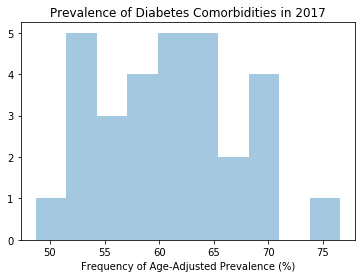

In [8]:
hcl = hcl_ovr.loc[(hcl_ovr.Year == 2017) & (hcl_ovr.LocationDesc.isin(diabetesbelt))]
hbp = hbp_ovr.loc[(hbp_ovr.Year == 2017) & (hbp_ovr.LocationDesc.isin(diabetesbelt))]

check_norm_hcl = hcl.DataValue.values; check_norm_hcl.astype(np.float)
check_norm_hbp = hbp.DataValue.values; check_norm_hbp.astype(np.float)
check_norm = np.concatenate((check_norm_hcl,check_norm_hbp))

plt.title('Prevalence of Diabetes Comorbidities in 2017')
sns.distplot(check_norm, kde=False, bins=10)
plt.xlabel('Frequency of Age-Adjusted Prevalence (%)')

print("Prevalence of Diabetes Comorbidities in 2017: "); print('')
alpha = 0.05

stat1, p1 = stats.normaltest(check_norm)
print("Normality: ")
if p1 > alpha:
    print('p=%.3f' % (p1) + " > " + str(alpha)); print('Assumption Met')
    print("Fail to reject the null hypothesis. (Sample is a Normal Distribution)")
else:
    print('p=%.3f' % (p1) + " < " + str(alpha)); print("Reject the null hypothesis.(Sample is NOT a Normal Distribution)")

print('')

stat, p = levene(check_norm_hcl,check_norm_hbp)
print("Homogeneity of Variances using Levene's Test: ")
if p > alpha:  # null hypothesis: Variances are equal
    print('p=%.3f' % (p) + " > " + str(alpha)); print('Assumption Met')
    print("Fail to reject the null hypothesis. (Variances are equal for all samples)")
else:
    print('p=%.3f' % (p) + " < " + str(alpha)); print("Reject the null hypothesis. (Variances are NOT equal for all samples)")
    
print('')
    
tstat, pt = stats.ttest_ind(check_norm_hcl,check_norm_hbp)
print("Independent T-Test: ")
if pt > alpha: 
    print('p=%.3f' % (pt) + " > " + str(alpha))
    print("Fail to reject the null hypothesis. (Population means are equal)")
else:
    print('p=%.3f' % (pt) + " < " + str(alpha)); print("Reject the null hypothesis. (Population means are NOT equal)")
    
print('')
print("Mean of Prevalence for High Blood Pressure: " + str(np.mean(check_norm_hbp)))
print("Mean of Prevalence for High Cholesterol: " + str(np.mean(check_norm_hcl)))
print("Standard Deviation of Prevalence for High Blood Pressure: " + str(np.std(check_norm_hbp)))
print("Standard Deviation of Prevalence for High Cholesterol: " + str(np.std(check_norm_hcl)))

Prevalence of High Blood pressure and Comorbid Diabetes in 2017: 

Normality: 
p=0.672 > 0.05
Assumption Met
Fail to reject the null hypothesis. (Sample is a Normal Distribution)

Homogeneity of Variances using Levene's Test: 
p=0.143 > 0.05
Assumption Met
Fail to reject the null hypothesis. (Variances are equal for all samples)

Independent T-Test: 
p=0.153 > 0.05
Fail to reject the null hypothesis. (Population means are equal)

Mean of High Blood pressure Prevalence for Females: 64.24000000000001
Mean of High Blood pressure Prevalence for Males: 67.64
Standard Deviation of High Blood pressure Prevalence for Females: 7.146915418556456
Standard Deviation of High Blood pressure Prevalence for Males: 4.897727364128523


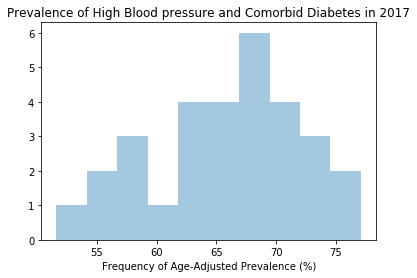

In [9]:
p_norm = hbp_g.loc[(hbp_g.Year == 2017) & (hbp_g.LocationDesc.isin(diabetesbelt))]; check_norm = p_norm.DataValue.values
p_norm_m = p_norm.loc[(p_norm.Stratification1 == 'Male')] ; p_norm_f = p_norm.loc[(p_norm.Stratification1 == 'Female')]
check_norm_m = p_norm_m.DataValue.values; check_norm_f = p_norm_f.DataValue.values

plt.title('Prevalence of High Blood pressure and Comorbid Diabetes in 2017')
sns.distplot(p_norm.DataValue, kde=False, bins=10)
plt.xlabel('Frequency of Age-Adjusted Prevalence (%)')

print("Prevalence of High Blood pressure and Comorbid Diabetes in 2017: "); print('')
alpha = 0.05

stat1, p1 = stats.normaltest(check_norm)
print("Normality: ")
if p1 > alpha:  # null hypothesis: HBPxDiabetes data follows a normal distribution
    print('p=%.3f' % (p1) + " > " + str(alpha)); print('Assumption Met')
    print("Fail to reject the null hypothesis. (Sample is a Normal Distribution)")
else:
    print('p=%.3f' % (p1) + " < " + str(alpha)); print("Reject the null hypothesis.(Sample is NOT a Normal Distribution)")

print('')

stat, p = levene(check_norm_m,check_norm_f)
print("Homogeneity of Variances using Levene's Test: ")
if p > alpha:  # null hypothesis: Variances are equal
    print('p=%.3f' % (p) + " > " + str(alpha)); print('Assumption Met')
    print("Fail to reject the null hypothesis. (Variances are equal for all samples)")
else:
    print('p=%.3f' % (p) + " < " + str(alpha)); print("Reject the null hypothesis. (Variances are NOT equal for all samples)")
    
print('')
    
tstat, pt = stats.ttest_ind(check_norm_m,check_norm_f)
print("Independent T-Test: ")
if pt > alpha: 
    print('p=%.3f' % (pt) + " > " + str(alpha))
    print("Fail to reject the null hypothesis. (Population means are equal)")
else:
    print('p=%.3f' % (pt) + " < " + str(alpha)); print("Reject the null hypothesis. (Population means are NOT equal)")
    
print('')
print("Mean of High Blood pressure Prevalence for Females: " + str(np.mean(check_norm_f)))
print("Mean of High Blood pressure Prevalence for Males: " + str(np.mean(check_norm_m)))
print("Standard Deviation of High Blood pressure Prevalence for Females: " + str(np.std(check_norm_f)))
print("Standard Deviation of High Blood pressure Prevalence for Males: " + str(np.std(check_norm_m)))

Prevalence of High Cholesterol and Comorbid Diabetes in 2017: 

Normality: 
p=0.003 < 0.05
Reject the null hypothesis.(Sample is NOT a Normal Distribution)

Homogeneity of Variances using Levene's Test: 
p=0.138 > 0.05
Assumption Met
Fail to reject the null hypothesis. (Variances are equal for all samples)

Independent T-Test: 
p=0.421 > 0.05
Fail to reject the null hypothesis. (Population means are equal)

Mean of High Cholesterol Prevalence for Females: 56.126666666666665
Mean of High Cholesterol Prevalence for Males: 58.41333333333332
Standard Deviation of High Cholesterol Prevalence for Females: 5.361898502914386
Standard Deviation of High Cholesterol Prevalence for Males: 9.003693069451495


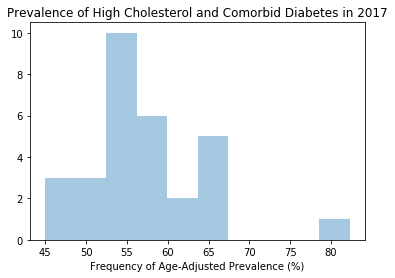

In [10]:
p_norm = hcl_g.loc[(hcl_g.Year == 2017) & (hcl_g.LocationDesc.isin(diabetesbelt))]; check_norm = p_norm.DataValue.values
p_norm_m = p_norm.loc[(p_norm.Stratification1 == 'Male')] ; p_norm_f = p_norm.loc[(p_norm.Stratification1 == 'Female')]
check_norm_m = p_norm_m.DataValue.values; check_norm_f = p_norm_f.DataValue.values

plt.title('Prevalence of High Cholesterol and Comorbid Diabetes in 2017')
sns.distplot(p_norm.DataValue, kde=False, bins=10)
plt.xlabel('Frequency of Age-Adjusted Prevalence (%)')

print("Prevalence of High Cholesterol and Comorbid Diabetes in 2017: "); print('')
alpha = 0.05

stat1, p1 = stats.normaltest(check_norm)
print("Normality: ")
if p1 > alpha:  # null hypothesis: HBPxDiabetes data follows a normal distribution
    print('p=%.3f' % (p1) + " > " + str(alpha)); print('Assumption Met')
    print("Fail to reject the null hypothesis. (Sample is a Normal Distribution)")
else:
    print('p=%.3f' % (p1) + " < " + str(alpha)); print("Reject the null hypothesis.(Sample is NOT a Normal Distribution)")

print('')

stat, p = levene(check_norm_m,check_norm_f)
print("Homogeneity of Variances using Levene's Test: ")
if p > alpha:  # null hypothesis: Variances are equal
    print('p=%.3f' % (p) + " > " + str(alpha)); print('Assumption Met')
    print("Fail to reject the null hypothesis. (Variances are equal for all samples)")
else:
    print('p=%.3f' % (p) + " < " + str(alpha)); print("Reject the null hypothesis. (Variances are NOT equal for all samples)")
    
print('')
    
tstat, pt = stats.ttest_ind(check_norm_m,check_norm_f)
print("Independent T-Test: ")
if pt > alpha: 
    print('p=%.3f' % (pt) + " > " + str(alpha))
    print("Fail to reject the null hypothesis. (Population means are equal)")
else:
    print('p=%.3f' % (pt) + " < " + str(alpha)); print("Reject the null hypothesis. (Population means are NOT equal)")
    
print('')
print("Mean of High Cholesterol Prevalence for Females: " + str(np.mean(check_norm_f)))
print("Mean of High Cholesterol Prevalence for Males: " + str(np.mean(check_norm_m)))
print("Standard Deviation of High Cholesterol Prevalence for Females: " + str(np.std(check_norm_f)))
print("Standard Deviation of High Cholesterol Prevalence for Males: " + str(np.std(check_norm_m)))